## data loader

In [30]:
from graphlstm_vae_ad import GraphLSTM_VAE_AD
import pandas as pd
import numpy as np

process = "lu.C.16_pmu"
# process2 = "lu.C.16_inject_cpuocp"
duration = "100ms_closed"

DATASET = "/root/MPI_profile/"+ process + "/" + duration + "/node_feature.csv"
TOPOLOGY = "/root/MPI_profile/"+ process + "/" + duration + "/graph_edge"

# DATASET2 = "/root/MPI_profile/"+ process2 + "/" + duration + "/node_feature.csv"
# TOPOLOGY = "/home/sx/MPI_profile/"+ process + "/" + duration + "/graph_edge"

def edge_load(filename, len):
    edge_data = pd.read_csv(filename, header=0)
    edge_data = edge_data.groupby(['ts_id','src', 'dst']).agg({'commsize': 'sum'}).reset_index()
    edge_index_dict = {}
    edge_weight_dict = {}
    for ts_id, group in edge_data.groupby('ts_id'):
        edge_index = group[['src', 'dst']].values.T.tolist()  # Transpose to get shape (2, num_edges)
        edge_index_dict[ts_id] = edge_index

        edge_weight = group['commsize'].values.tolist()
        edge_weight_dict[ts_id] = edge_weight

    edge_index_list = []
    edge_weight_list = []
    for i in range(len):
        if i in edge_index_dict.keys():
            edge_index_list.append(edge_index_dict[i])
            edge_weight_list.append(edge_weight_dict[i])

            
        else:
            edge_index_list.append([[], []])
            edge_weight_list.append([])

    return edge_index_list, edge_weight_list


def data_load(filename): 
    data = pd.read_csv(filename, header=[0,1])
    data.columns.names = ['metric', 'host']
    tempm = data.stack()
    tempm = (tempm-tempm.mean())/(tempm.std())
    metric = tempm.unstack().swaplevel('metric','host',axis=1).stack().unstack()

    edge_index, edge_weight = edge_load(TOPOLOGY, len(metric))
    # edge_data = pd.read_csv(TOPOLOGY, header=0)
    # edge_data = edge_data.groupby(['ts_id','src', 'dst']).agg({'commsize': 'sum'}).reset_index()
    # edge_data = edge_data.groupby(['src', 'dst']).agg({'commsize': 'sum'}).reset_index()

    # edge_index = edge_data[['src', 'dst']].values.T.tolist()
    # edge_weight = edge_data['commsize'].values.tolist()

    print("metric:")
    print(len(metric))

    print("Edge Index:")
    print(len(edge_index))
    print(edge_index)

    print("Edge Weight:")
    print(len(edge_weight))
    print(edge_weight)

    return metric, edge_index, edge_weight

metric, edge_index, edge_weight = data_load(DATASET)
# metric2, edge_index, edge_weight = data_load(DATASET2)


metric:
393
Edge Index:
393
[[[], []], [[], []], [[], []], [[], []], [[], []], [[], []], [[], []], [[], []], [[], []], [[], []], [[0, 1, 1, 8, 9, 9], [1, 0, 2, 9, 8, 10]], [[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15], [1, 4, 0, 2, 5, 1, 3, 6, 2, 7, 0, 5, 8, 1, 4, 6, 9, 2, 5, 7, 10, 3, 6, 11, 4, 9, 12, 5, 8, 10, 13, 6, 9, 11, 14, 7, 10, 15, 8, 13, 9, 12, 14, 10, 13, 15, 11, 14]], [[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15], [1, 4, 0, 2, 5, 1, 3, 6, 2, 7, 0, 5, 8, 1, 4, 6, 9, 2, 5, 7, 10, 3, 6, 11, 4, 9, 12, 5, 8, 10, 13, 6, 9, 11, 14, 7, 10, 15, 8, 13, 9, 12, 14, 10, 13, 15, 11, 14]], [[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15], [1, 4, 0

## 加载数据与模型

In [ ]:
print(len(metric), len(metric2))
metric_merge = pd.concat([metric, metric2], axis=0)
print(metric_merge)

In [42]:
# model = GraphLSTM_VAE_AD(sequence_length=120, gpu=1)
# process = "lu.C.16"
# duration = "100ms_closed"
model = GraphLSTM_VAE_AD(name=process + "_" + duration, kind='GAT', gpu=1,  sequence_length=30, hidden_dim=8, batch_size=32, lr=1e-3, num_epochs=1000)

## 训练模型

Epoch [301/1000], Iter [6/7], total_loss: 2496.4897
valid_loss: [8392.313802083334, 8440.222005208334, 8655.267903645834, 8205.324381510416, 8288.693522135416, 8060.870930989583, 8051.638509114583, 7979.931315104167, 8027.999348958333, 7900.901529947917, 7634.677734375, 7544.163411458333, 7383.774576822917, 7056.863606770833, 7023.29150390625, 6830.149576822917, 6750.31689453125, 6329.074055989583, 6386.76806640625, 6418.332194010417, 6342.138346354167, 6344.481119791667, 6120.093098958333, 5919.51220703125, 6097.118977864583, 6016.254557291667, 6132.215494791667, 6020.99072265625, 5993.440592447917, 6035.656901041667, 5866.1298828125, 6021.503743489583, 5999.051106770833, 5984.8701171875, 5986.810709635417, 5972.30615234375, 5861.060384114583, 5875.173502604167, 6058.666015625, 5920.76904296875, 5876.026041666667, 5992.561848958333, 6011.835774739583, 5828.11962890625, 5681.256510416667, 5844.263346354167, 5745.794596354167, 5919.762858072917, 5710.792154947917, 5799.674641927083, 590

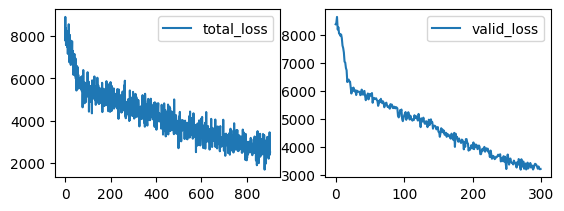

100%|██████████| 3/3 [00:01<00:00,  1.99it/s]


In [43]:
model.fit(metric, 16, edge_index, log_step=2, patience=30, step=10)

In [33]:
model.load(16, metric.shape[1])

In [34]:
scores_sum = []
scores_max = []
scores = []
outputs = []
scores, scores_sum, scores_max, outputs = model.predict(metric, 16, edge_index, 1)

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

364
(30,)
364
(30, 16)


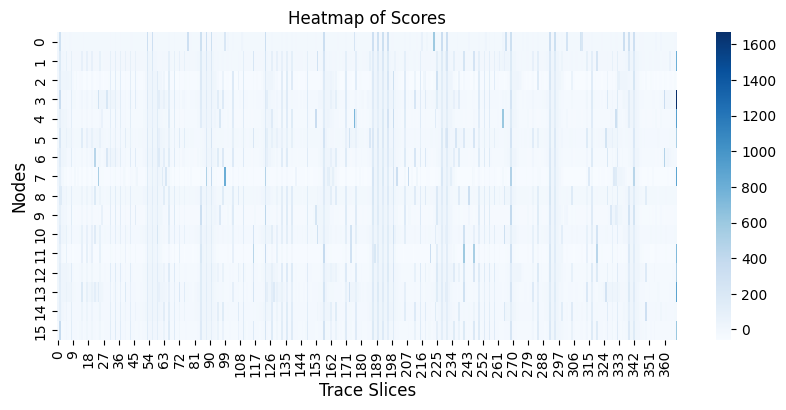

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sequence_length = 30
step = 10

shuffle_scores = scores
# print(scores.shape)
# # shuffle_scores = []
# shuffle_scores = np.zeros_like(scores)
# for seq in scores:
#     for step_index in range(sequence_length):
#         idx = step_index * step
#         shuffle_scores[idx:idx + step] += seq[step_index]



# 假设 scores_sum 是形状为 (699, 16) 的数组
# scores_sum = np.random.rand(699, 16)
shuffle_scores = shuffle_scores.T
# shuffle_scores = shuffle_scores[:, :360]
# 设置绘图尺寸
plt.figure(figsize=(10, 4))

# 使用 seaborn 绘制热力图
# vmin=-100, vmax=1500
sns.heatmap(shuffle_scores, cmap='Blues', cbar=True)

# 设置标题和标签
plt.title('Heatmap of Scores', fontsize=12)
plt.xlabel('Trace Slices', fontsize=12)
plt.ylabel('Nodes', fontsize=12)

# 显示热力图
plt.show()

In [29]:
print(outputs.shape)

(695, 16, 8)


In [30]:
mylog = open('/home/sx/MPI_profile/lu.C.16/100ms/output.txt', mode = 'a',encoding='utf-8')
for i in range(len(outputs)):
    print(outputs[i], file=mylog)
mylog.close()
# df_outputs = pd.DataFrame(data=outputs)
# df_outputs.to_csv('outputs.csv')
# print(outputs)

In [32]:
mylog = open('/home/sx/MPI_profile/lu.C.16/100ms/scores_sum.txt', mode = 'a',encoding='utf-8')
for i in range(len(scores_max)):
    print(scores_max[i], file=mylog)
mylog.close()

In [ ]:
mylog = open('/home/sx/MPI_profile/lu.C.16/100ms/scores_max.txt', mode = 'a',encoding='utf-8')
for i in range(len(scores_max)):
    print(scores_max[i], file=mylog)
mylog.close()